<a href="https://colab.research.google.com/github/gayathrivanaparthy/2216133-aiml-bootcamp/blob/main/Day_5_ShScores_Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#step 1
dataset="/content/drive/MyDrive/Employee_StudyHours.csv"
import pandas as pd

df=pd.read_csv(dataset)  #dataframe -2D

In [ ]:
df.shape

(32, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   30 non-null     float64
 1   Scores  30 non-null     float64
dtypes: float64(2)
memory usage: 640.0 bytes


In [ ]:
#step 2
#visualize the dataset
import matplotlib.pyplot as plt   #For graphs


Text(0.5, 1.0, 'Employee score analysis')

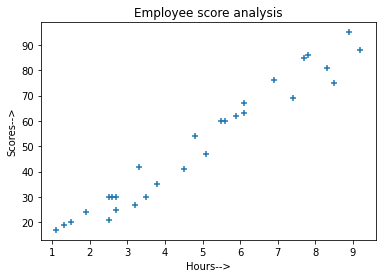

In [ ]:
plt.scatter(df.Hours,df.Scores,marker='+')
plt.xlabel("Hours-->")
plt.ylabel("Scores-->")
plt.title("Employee score analysis")

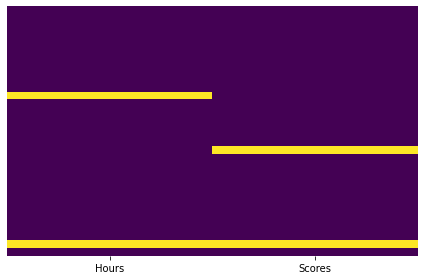

In [ ]:
#seaborn (SuperSet of .matplotlib)
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')  #this func identifies NULL  #viridis is theme
  plt.tight_layout()   #optional
  return plt.show()

get_heatmap(df)


In [ ]:
#step 3
#Preprocessing the dataset

#method to drop the rows with NaN values
'''df.dropna()
df.head()'''

#method to replace the data points
import math
median_hours= math.floor(df.Hours.median())
median_hours


4

In [ ]:
df.Hours=df.Hours.fillna(median_hours)

In [ ]:
mean_Scores=math.floor(df.Scores.mean())
mean_Scores

51

In [ ]:
df.Scores=df.Scores.fillna(mean_Scores)

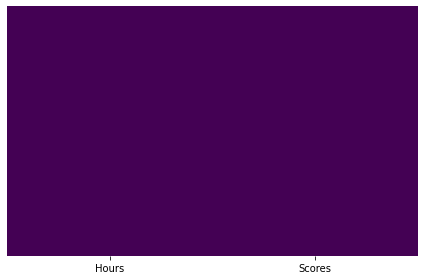

In [ ]:
#seaborn (SuperSet of .matplotlib)
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4)) #optional
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')  #this func identifies NULL  #viridis is theme
  plt.tight_layout()   #optional
  return plt.show()

get_heatmap(df)


Step 4:Preparing the Data for feeding the model

In [ ]:
#x--> independent value  - features
#y--> dependent value  -  label

x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

In [ ]:
import numpy as np
x=np.array(df[['Hours']])
y=np.array(df[['Scores']])
#print(x)
#print('\n')
print(y)

[[21.]
 [47.]
 [27.]
 [75.]
 [30.]
 [20.]
 [88.]
 [60.]
 [81.]
 [25.]
 [85.]
 [85.]
 [62.]
 [41.]
 [42.]
 [17.]
 [95.]
 [30.]
 [51.]
 [24.]
 [67.]
 [69.]
 [30.]
 [54.]
 [35.]
 [76.]
 [86.]
 [19.]
 [30.]
 [63.]
 [51.]
 [60.]]


Splitting the dataset into training and testing data

In [ ]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)  #random state= shuffles data and splir


In [ ]:
x_train

array([[4.8],
       [5.1],
       [5.6],
       [9.2],
       [3.5],
       [3.4],
       [6.1],
       [1.9],
       [2.7],
       [5.5],
       [1.3],
       [8.5],
       [2.5],
       [7.4],
       [1.1],
       [5.9]])

In [ ]:
x_test

array([[4. ],
       [2.7],
       [7.7],
       [3.2],
       [8.9],
       [3.3],
       [2.6],
       [7.8],
       [6.1],
       [4.5],
       [3.8],
       [1.5],
       [2.5],
       [8.3],
       [4. ],
       [6.9]])

In [ ]:
y_train

array([[54.],
       [47.],
       [60.],
       [88.],
       [30.],
       [51.],
       [63.],
       [24.],
       [25.],
       [60.],
       [19.],
       [75.],
       [21.],
       [69.],
       [17.],
       [62.]])

In [ ]:
y_test

array([[85.],
       [30.],
       [85.],
       [27.],
       [95.],
       [42.],
       [30.],
       [86.],
       [67.],
       [41.],
       [35.],
       [20.],
       [30.],
       [81.],
       [51.],
       [76.]])

In [ ]:
#Training Model   -Fitting the Algorithm
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([[42.07606843],
       [30.71247065],
       [74.41861595],
       [35.08308518],
       [84.90809083],
       [35.95720809],
       [29.83834774],
       [75.29273886],
       [60.43264946],
       [46.44668296],
       [40.32782262],
       [20.22299578],
       [28.96422484],
       [79.66335339],
       [42.07606843],
       [67.42563271]])

In [ ]:
y_test

array([[85.],
       [30.],
       [85.],
       [27.],
       [95.],
       [42.],
       [30.],
       [86.],
       [67.],
       [41.],
       [35.],
       [20.],
       [30.],
       [81.],
       [51.],
       [76.]])

In [ ]:
print("Predicted value for training data:",model.score(x_train,y_train)*100)

Predicted value for training data: 93.2080968030798


In [ ]:
print("Predicted value for testing data:",model.score(x_test,y_test))
print("Testing Accuracy:",model.score(x_test,y_test)*100)

Predicted value for testing data: 0.7540031072776417
Testing Accuracy: 75.40031072776418


In [ ]:
accuracy= model.score(x,y)*100
print(accuracy)

83.29534250612926


In [ ]:
model.coef_

array([[8.74122906]])

In [ ]:
model.intercept_

array([7.11115218])

Visualizing Results

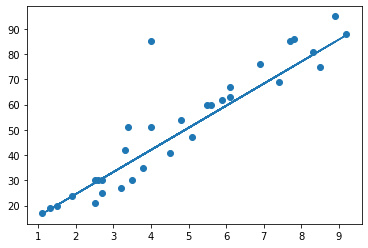

In [ ]:
#Plotting the Linear Regression
line= model.coef_*x+model.intercept_
import matplotlib.pyplot as plt
plt.scatter(x,y) #for Data points
plt.plot(x,line)  # for Best Fit Line
plt.show()       # to display

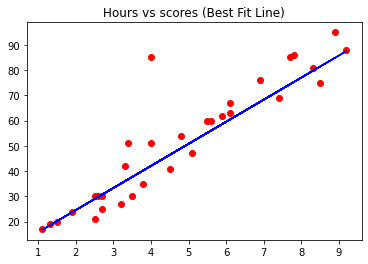

In [ ]:
plt.title("Hours vs scores (Best Fit Line)")
plt.scatter(x,y,color='Red')   #for Data points
plt.plot(x,line,color='Blue')  # for Best Fit Line
plt.show()                     # to display

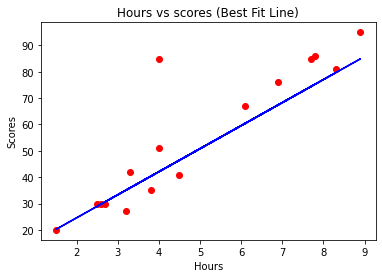

In [ ]:
#testing phase
plt.title("Hours vs scores (Best Fit Line)")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(x_test,y_test,color='Red')               #for Data points
plt.plot(x_test,model.predict(x_test),color='Blue')  # for Best Fit Line
plt.show()                                            # to display

In [ ]:
y_test

array([[85.],
       [30.],
       [85.],
       [27.],
       [95.],
       [42.],
       [30.],
       [86.],
       [67.],
       [41.],
       [35.],
       [20.],
       [30.],
       [81.],
       [51.],
       [76.]])

In [ ]:
y_pred

array([[42.07606843],
       [30.71247065],
       [74.41861595],
       [35.08308518],
       [84.90809083],
       [35.95720809],
       [29.83834774],
       [75.29273886],
       [60.43264946],
       [46.44668296],
       [40.32782262],
       [20.22299578],
       [28.96422484],
       [79.66335339],
       [42.07606843],
       [67.42563271]])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual':[y_test], 'Predicted':[y_pred]})
df

,Actual,Predicted
0,"[[85.0], [30.0], [85.0], [27.0], [95.0], [42.0...","[[42.07606842872692], [30.712470649443112], [7..."


In [ ]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean square Error:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error: 7.921253653844839
Mean Squared Error: 158.15966628931903
Root Mean square Error: 2.8144721803288157
